# BUSINESS CASE: BASED ON BRAIN MRI IMAGES DATASET WE NEED PREDICT BRAIN TUMOUR


# TASK: BINARY CLASSIFICATION

![image.png](attachment:image.png)

A brain tumour, known as a central nervous system tumour or an intracranial tumour, is an abnormal mass of cells that grows from either the brain or surrounding tissue. There are >150 types of brain tumour: some are cancerous (malignant) while some are non-cancerous (benign). They may grow slowly or quickly. Regardless of the type of tumour, the tumour can become large and compress the nearby nerves and blood vessels and hinder the brain’s functioning.

More men are affected by brain tumours than women, and it is more common in older people.

Brain tumours can be either primary or secondary. The tumour is primary if it has developed from the cells of the brain or its surrounding tissues; however, a tumour is metastatic or secondary if it originated from another organ and has migrated to the brain via the blood. Primary tumours may be benign or malignant, while metastatic tumours are always malignant.

# DATA SUMMARY
* Total 274 Jpg Images are present In two classes
1. No  ----> 119
2. Yes ----> 155

# DEVICE THE PROJECT INTO MULTIPLE STEPS
1. Prepare training, validation and testing set
2. Get all classes labels
3. Visualise training images
4. Used CNN & VGG19 model
5. Model Compilation
6. Model Training
7. Model Evaluation
8. Model Saving
9. Prediction on test data

# PYTHON IMPLIMENTATION

### IMPORTING NECESSARY LIBRARY

In [3]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Lambda, GlobalAveragePooling2D
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras import regularizers
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

!pip install visualkeras

import visualkeras
from glob import glob
import numpy as np
import cv2
import os


# Used to supress the warnings
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 6.7 MB/s eta 0:00:00


### DATA LOADING PREPARATION AND VISUALISATION

In [6]:
folder_path = r"/content/drive/MyDrive/brain_tumor_dataset/"
no_images = os.listdir(folder_path + '/no/')
yes_images = os.listdir(folder_path + '/yes/')

dataset = []
label = []

for image_name in no_images:
    image = cv2.imread(folder_path + '/no/' + image_name)
    image = Image.fromarray(image)
    image = image.resize((240,240))
    dataset.append(np.array(image))
    label.append(0)


for image_name in yes_images:
    image = cv2.imread(folder_path + '/yes/' + image_name)
    image = Image.fromarray(image)
    image = image.resize((240,240))
    dataset.append(np.array(image))
    label.append(1)


dataset = np.array(dataset)
label = np.array(label)
print('Dataset Shape:',dataset.shape,'Label Shape:',label.shape)

Dataset Shape: (253, 240, 240, 3) Label Shape: (253,)


### SPLIT DATA INTO TRAINING AND TESTING

In [7]:
X_train,X_test,y_train,y_test = train_test_split(dataset,label, test_size=0.2,shuffle=True, random_state=42)

In [8]:
X_train.shape

(202, 240, 240, 3)

In [9]:
X_test.shape

(51, 240, 240, 3)

In [10]:
# Rescale the image by dividing every pixel of image by 255

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

print("X_train",X_train.shape)
print("X_train samples",X_train.shape[0]) # 0 is index no
print("X_test",X_test.shape[0]) # 0 is index no

X_train (202, 240, 240, 3)
X_train samples 202
X_test 51


### VISUALISE BOTH CLASSES IMAGES WITH THE HELP OF OPEN-CV

In [12]:
no = os.listdir(r"/content/drive/MyDrive/brain_tumor_dataset/no")
print(no[:6])
yes = os.listdir(r"/content/drive/MyDrive/brain_tumor_dataset/yes")
print(yes[:6])

['11 no.jpg', '10 no.jpg', '1 no.jpeg', '32 no.jpg', '38 no.jpg', '30 no.jpg']
['Y156.JPG', 'Y194.jpg', 'Y36.JPG', 'Y16.JPG', 'Y258.JPG', 'Y180.jpg']


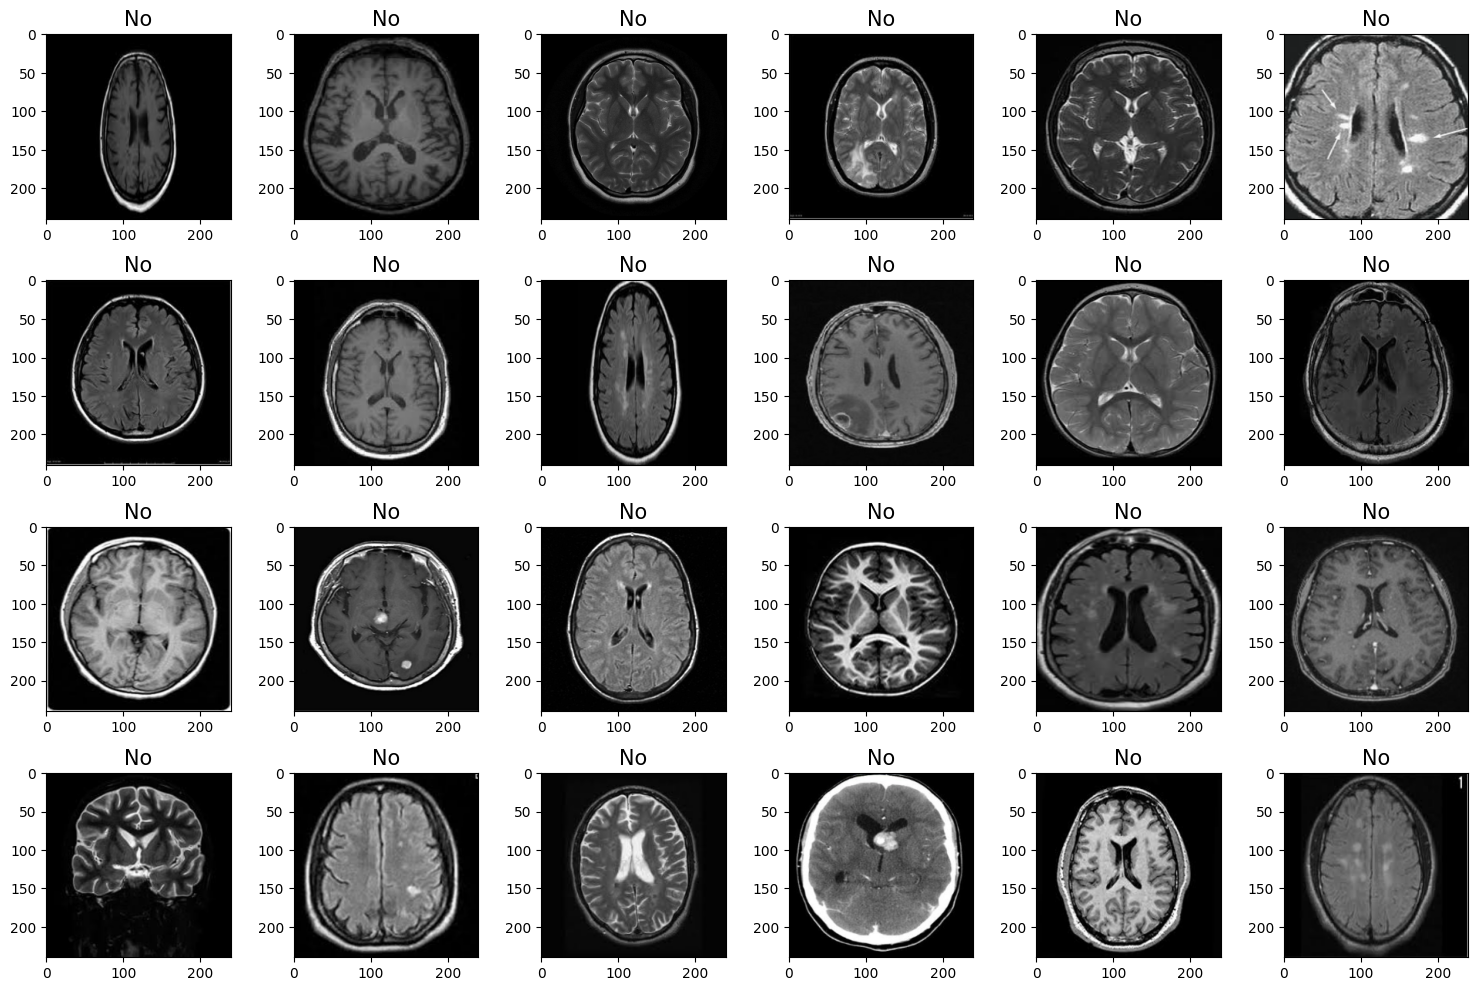

In [13]:
plt.figure(figsize=(15,10), facecolor='white')
for i in range(24):
    plt.subplot(4,6,i+1)
    img = cv2.imread(r"/content/drive/MyDrive/brain_tumor_dataset/no" + '/' + no[i])
    resize_img = cv2.resize(img,(240,240))
    plt.imshow(resize_img)
    plt.title("No",fontsize=15)
plt.tight_layout()

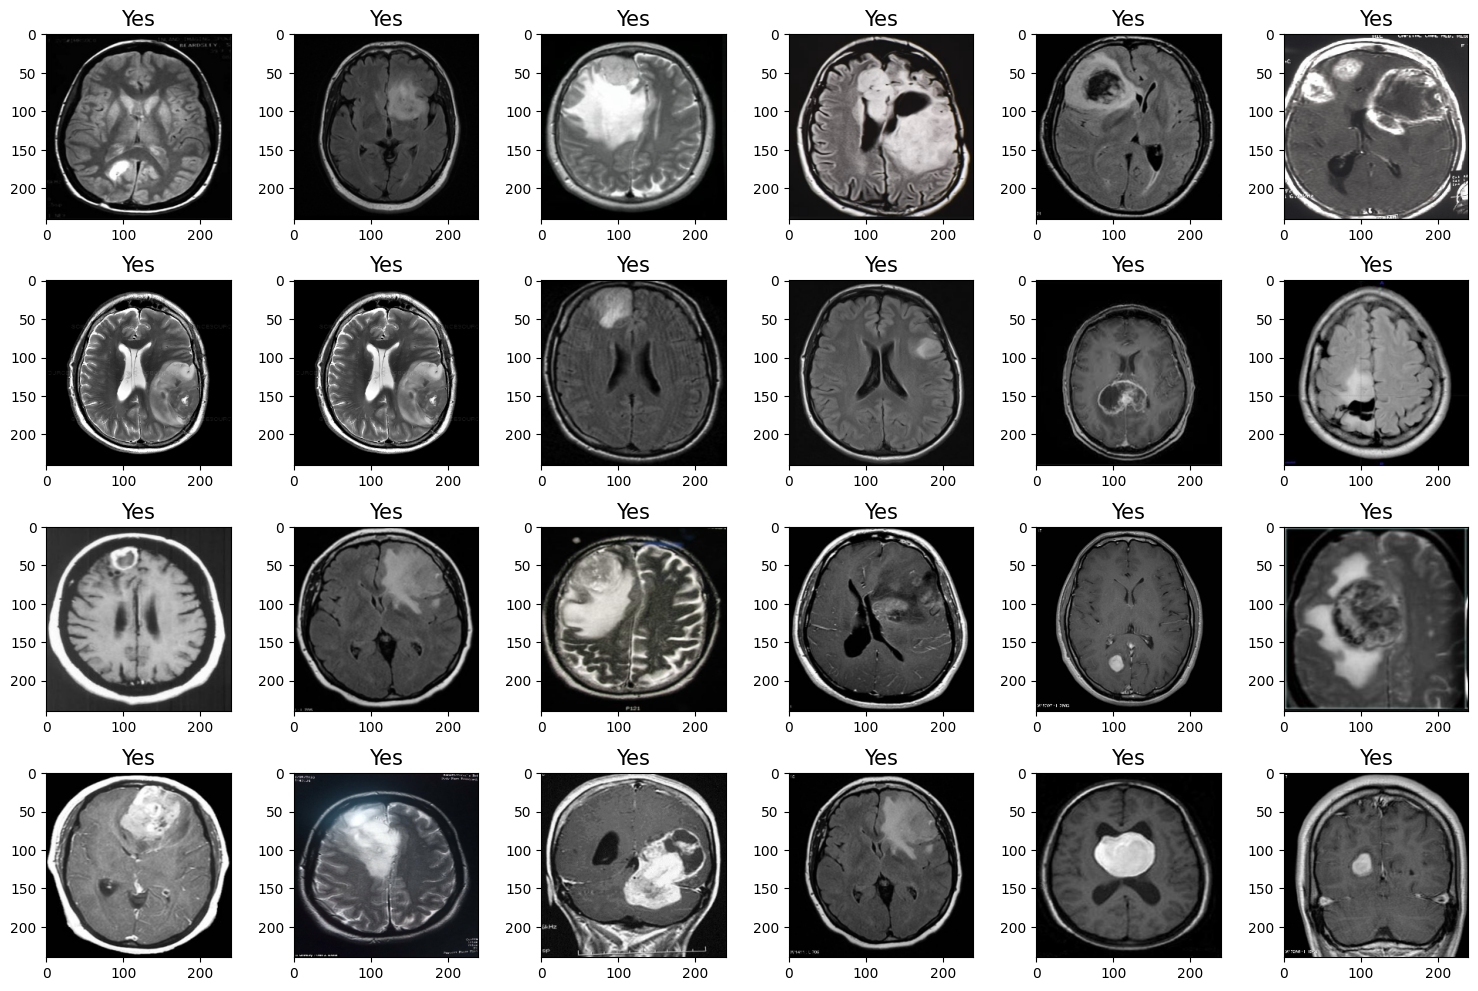

In [14]:
plt.figure(figsize=(15,10))
for j in range(24):
    plt.subplot(4,6,j+1)
    img = cv2.imread(r"/content/drive/MyDrive/brain_tumor_dataset/yes" +  '/' + yes[j])
    resize = cv2.resize(img, (240,240))
    plt.imshow(resize)
    plt.title("Yes",fontsize=15)
plt.tight_layout()


### BUILD CNN ARCHITECTURE

In [15]:
model = tf.keras.Sequential([

    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=(2,2), activation="relu", padding="valid",input_shape=(240,240,3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=(2,2), activation="relu", padding="valid"),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu',
                          kernel_regularizer=regularizers.L1L2(l1=1e-3, l2=1e-3),
                          bias_regularizer=regularizers.L2(1e-2),
                          activity_regularizer=regularizers.L2(1e-3)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=1, activation='sigmoid'),
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 119, 119, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 59, 59, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 64)                4

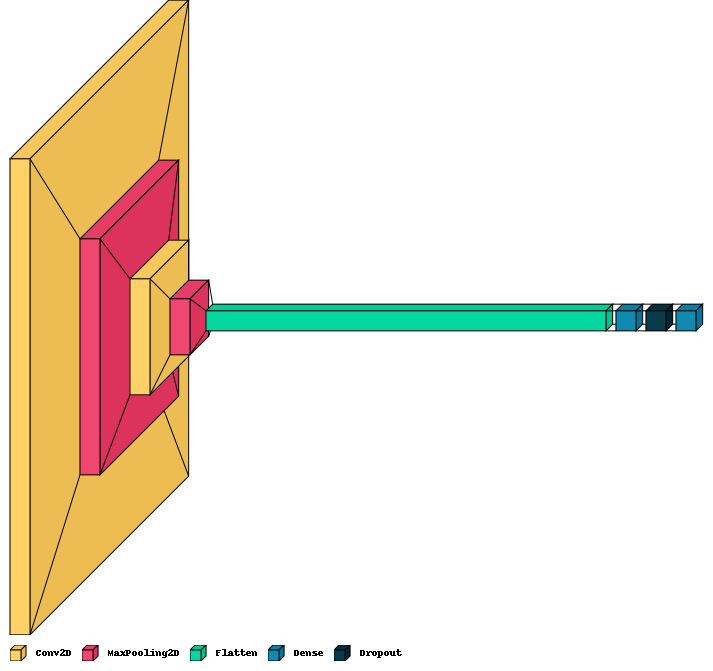

In [17]:
visualkeras.layered_view(model, legend=True)

### COMPILE & TRAIN MODEL

In [18]:
model.compile(loss=tf.keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

In [19]:
# Compute the class weights
class_weights = class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(y_train),y=y_train)
class_weights = dict(zip(np.unique(y_train),class_weights))
class_weights

{0: 1.294871794871795, 1: 0.8145161290322581}

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint

callback = ModelCheckpoint(filepath='cnn_model.hdf5', save_best_only=True, monitor='val_loss',verbose=1)

history = model.fit(X_train,y_train, epochs=80,
                    class_weight=class_weights,
                    validation_data=(X_test,y_test),
                    verbose=1,callbacks=callback)

Epoch 1/80
7/7 [==============================] - ETA: 0s - loss: 6.1252 - accuracy: 0.6881
Epoch 1: val_loss improved from inf to 4.93912, saving model to cnn_model.hdf5
7/7 [==============================] - 4s 395ms/step - loss: 6.1252 - accuracy: 0.6881 - val_loss: 4.9391 - val_accuracy: 0.7451
Epoch 2/80
7/7 [==============================] - ETA: 0s - loss: 4.2931 - accuracy: 0.7277
Epoch 2: val_loss improved from 4.93912 to 3.35018, saving model to cnn_model.hdf5
7/7 [==============================] - 3s 416ms/step - loss: 4.2931 - accuracy: 0.7277 - val_loss: 3.3502 - val_accuracy: 0.7647
Epoch 3/80
7/7 [==============================] - ETA: 0s - loss: 2.9178 - accuracy: 0.8119
Epoch 3: val_loss improved from 3.35018 to 2.31400, saving model to cnn_model.hdf5
7/7 [==============================] - 4s 558ms/step - loss: 2.9178 - accuracy: 0.8119 - val_loss: 2.3140 - val_accuracy: 0.7255
Epoch 4/80
7/7 [==============================] - ETA: 0s - loss: 2.0031 - accuracy: 0.7822


### PLOTTING TRAINING AND VALIDATION LOSS & ACCURACY

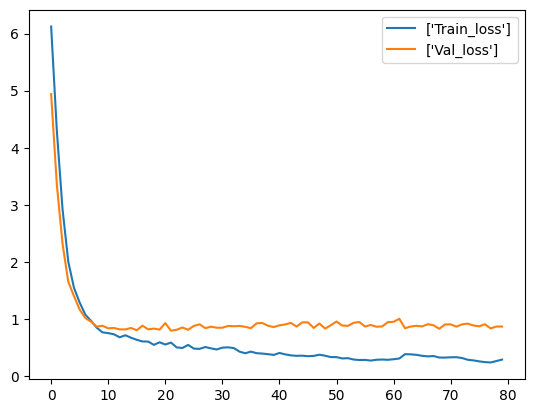

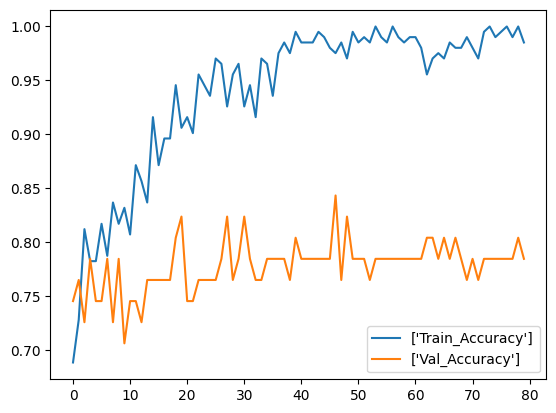

In [21]:
plt.plot(history.history['loss'],label=['Train_loss'])
plt.plot(history.history['val_loss'],label=['Val_loss'])
plt.legend()
plt.show()

plt.plot(history.history['accuracy'],label=['Train_Accuracy'])
plt.plot(history.history['val_accuracy'],label=['Val_Accuracy'])
plt.legend()
plt.show()

### MODEL EVALUATION

In [22]:
result = model.evaluate(X_test,y_test)
print("The Current Model Achived An Accuracy Of {}%".format(round(result[1]*100,2)))

2/2 [==============================] - 0s 66ms/step - loss: 0.8637 - accuracy: 0.7843
The Current Model Achived An Accuracy Of 78.43%


### USE VGG19 TO GET BETTER RESULT

In [23]:
image_size = [240,240]
vgg = VGG19(input_shape=image_size + [3], weights='imagenet', include_top=False)

80134624/80134624 [==============================] - 1s 0us/step


In [24]:
# Freeze the existing layer
for layer in vgg.layers:
    layer.trainable=False

In [25]:
# Adding more layers
x = Flatten()(vgg.output)
x = Dense(units=64, activation='relu',
        kernel_regularizer=regularizers.L1L2(l1=1e-3, l2=1e-3),
        bias_regularizer=regularizers.L2(1e-2),
        activity_regularizer=regularizers.L2(1e-3))(x)
prediction = Dense(1, activation='sigmoid')(x)
vgg_model = Model(vgg.input, outputs=prediction)

In [26]:
# Visualise the model summary
vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 240, 240, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 240, 240, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 120, 120, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 120, 120, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 120, 120, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 60, 60, 128)       0     

### VISUALISE THE MODEL

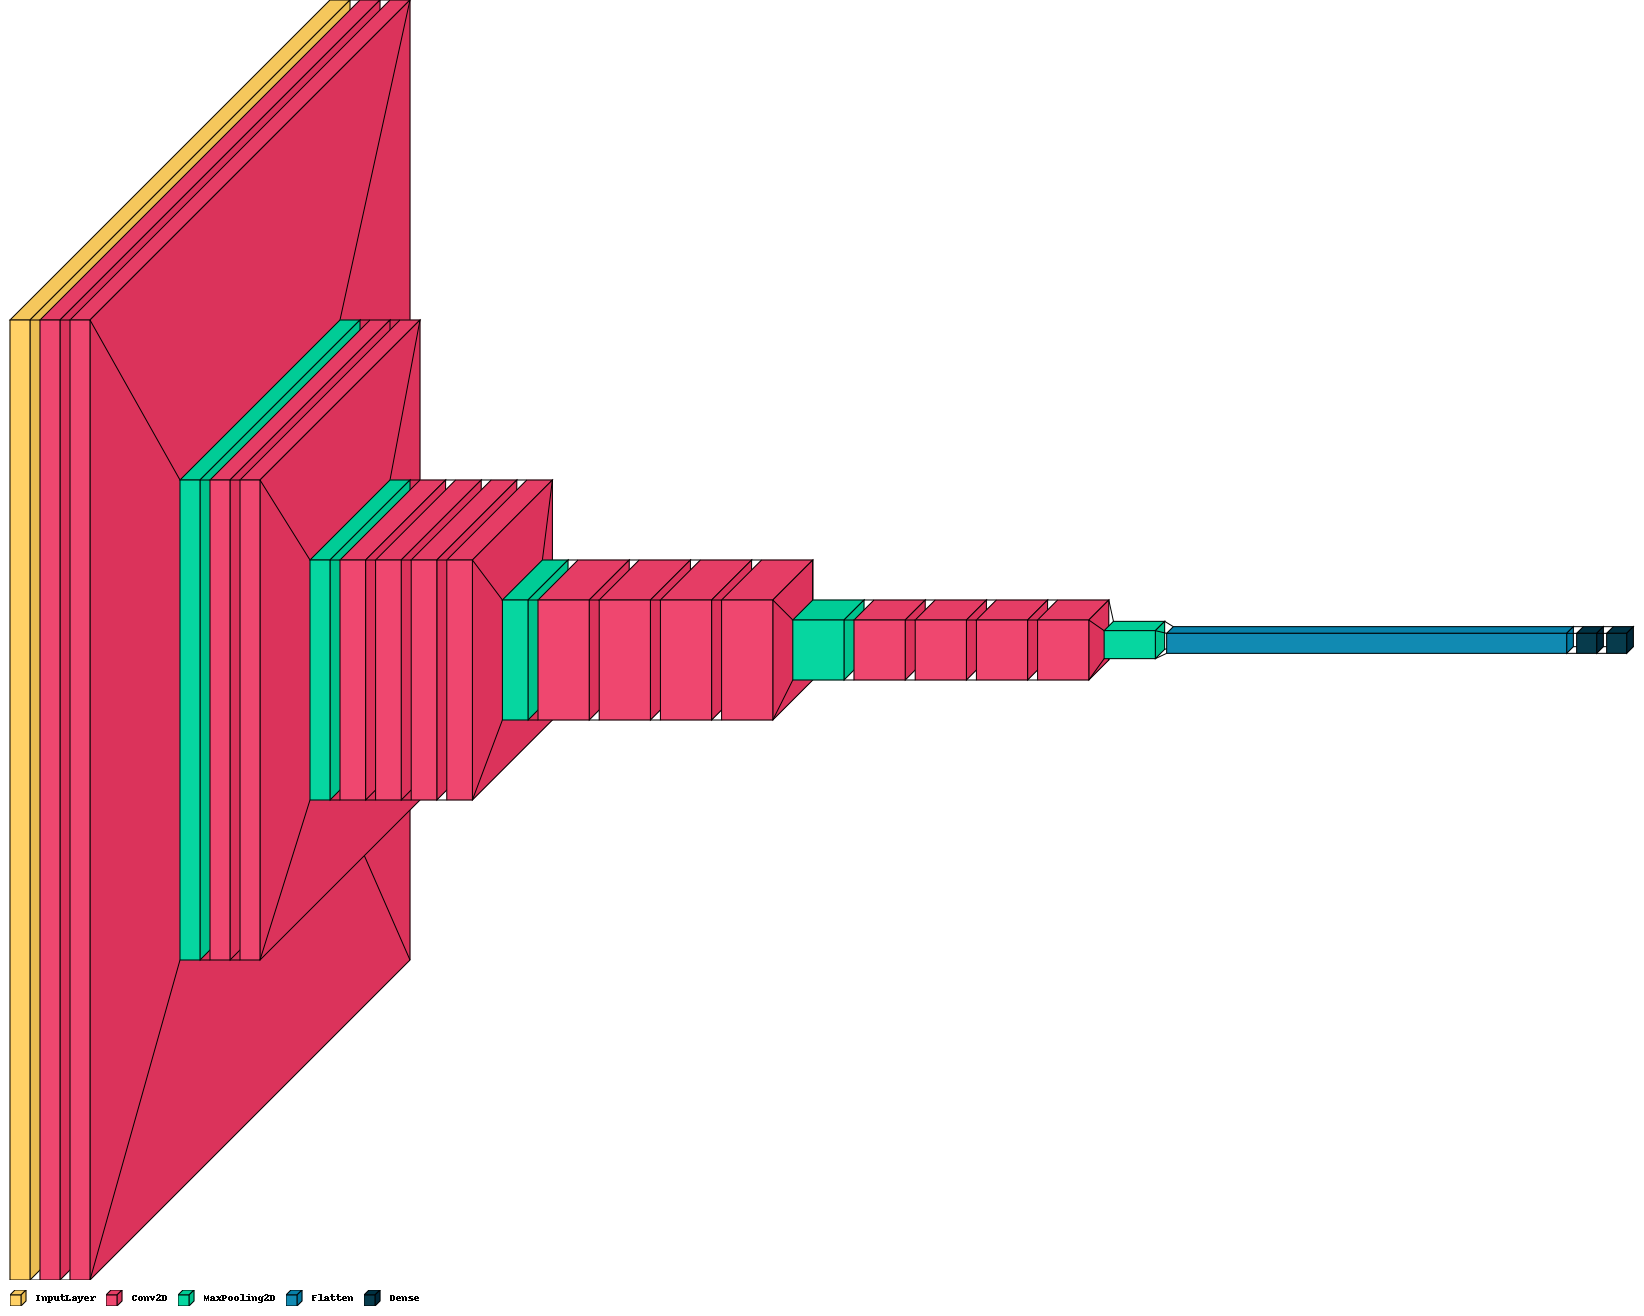

In [27]:
visualkeras.layered_view(vgg_model, legend=True)

### COMPILE & TRAIN MODEL

In [28]:
vgg_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
# Fit model for training
history = vgg_model.fit(X_train,y_train, epochs=60,
             class_weight=class_weights,
             validation_data=(X_test,y_test),
             verbose=1)

Epoch 1/60
7/7 [==============================] - 265s 39s/step - loss: 12.2707 - accuracy: 0.4406 - val_loss: 7.5464 - val_accuracy: 0.3922
Epoch 2/60
7/7 [==============================] - 261s 39s/step - loss: 5.9192 - accuracy: 0.5000 - val_loss: 4.5550 - val_accuracy: 0.6078
Epoch 3/60
6/7 [========================>.....] - ETA: 29s - loss: 4.3717 - accuracy: 0.6094

KeyboardInterrupt: ignored

### PLOTTING TRAINING, VALIDATION ACCURACY AS WELL AS LOSS

In [ ]:
plt.plot(history.history['loss'], label=["Train Loss"])
plt.plot(history.history['val_loss'],label=['Val Loss'])
plt.legend()
plt.show()


plt.plot(history.history['accuracy'], label=["Train Accuracy"])
plt.plot(history.history['val_accuracy'],label=['Val Accuracy'])
plt.legend()
plt.show()

### MODEL SAVING

In [ ]:
vgg_model.save('VGG19_Model.h5')

### MODEL EVALUATION

In [ ]:
result = vgg_model.evaluate(X_test,y_test)
print("Result of VGG19 Model {}%".format(round(result[1]*100,2)))

In [ ]:
predictions = vgg_model.predict(X_test)
y_pred = []
for i in predictions:
    if i >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
print(y_pred)